# Boosting Ensembling with XGBoost

<img src="https://www.researchgate.net/publication/348025909/figure/fig2/AS:1020217916416002@1620250314481/Simplified-structure-of-XGBoost.ppm" height=500 width=800>

## The Concept of Boosting and How It Differs from Bagging

Boosting is an ensemble technique that combines multiple weak learners to form a strong learner. The key idea behind boosting is to train models sequentially, each correcting its predecessor's errors.

### Key Differences from Bagging:

- **Sequential vs. Parallel:** Unlike bagging, where models are trained in parallel, boosting trains models sequentially.
- **Error Correction:** Boosting focuses on improving the predictions by specifically targeting misclassified instances by previous models.
- **Variance vs. Bias:** While bagging aims to reduce variance (overfitting), boosting primarily reduces bias (underfitting), though it can also reduce variance to some extent.

### Sequential Model Building in Boosting

In boosting, each new model is trained on the errors of the preceding models. The process can be outlined as follows:

1. Train a weak model on the dataset.
2. Identify instances that were misclassified or had higher errors.
3. Train a new model focusing on these difficult instances.
4. Combine the models using a weighted sum or vote.

This process is repeated until the addition of new models does not significantly improve performance, or a predetermined number of models have been added.

### Overview of Different Boosting Algorithms

1. **AdaBoost (Adaptive Boosting):** The first real boosting algorithm. It adjusts the weights of incorrectly classified instances so that subsequent classifiers focus more on difficult cases.
2. **Gradient Boosting:** Improves model predictions by minimizing a loss function, which can be customized. It builds one tree at a time, where each new tree helps to correct errors made by previously trained trees.
3. **XGBoost (Extreme Gradient Boosting):** An optimized version of Gradient Boosting that is faster and more efficient. It includes several enhancements, such as regularization to prevent overfitting.

> XGBoost stands out among boosting algorithms for its speed and performance. It handles large datasets efficiently and has been the algorithm behind many winning solutions in machine learning competitions.

Let's implement a basic XGBoost classifier to predict the weather.

Weather dataset.

In [3]:
#pip install opendatasets

In [ ]:
#pip install xgboost

In [4]:
import xgboost as xgb
import opendatasets as od
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [5]:
od.download('https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: samanvithabayaneni9
Your Kaggle Key: ··········


100%|██████████| 3.83M/3.83M [00:00<00:00, 137MB/s]

## Load the Data

In [6]:
df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [17]:
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

## Clean the Data

In [12]:
df.dropna(subset=['RainTomorrow'], inplace=True)

In [18]:
df.dropna(subset=['RainToday'], inplace=True)

## Feature Engineering

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df.Date.dt.day
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year
df.drop('Date',axis=1,inplace=True)

## Data Analysis & Visualization

In [126]:
import seaborn as sns

In [69]:
import matplotlib.pyplot as plt

In [73]:
#numerics

In [72]:
#df[numerics]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,1,12,2008
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2,12,2008
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,3,12,2008
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,4,12,2008
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,20,6,2017
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,21,6,2017
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,22,6,2017
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,23,6,2017


In [76]:
df[numerics].columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year'],
      dtype='object')

In [80]:
df.MinTemp.max()

33.9

<Axes: >

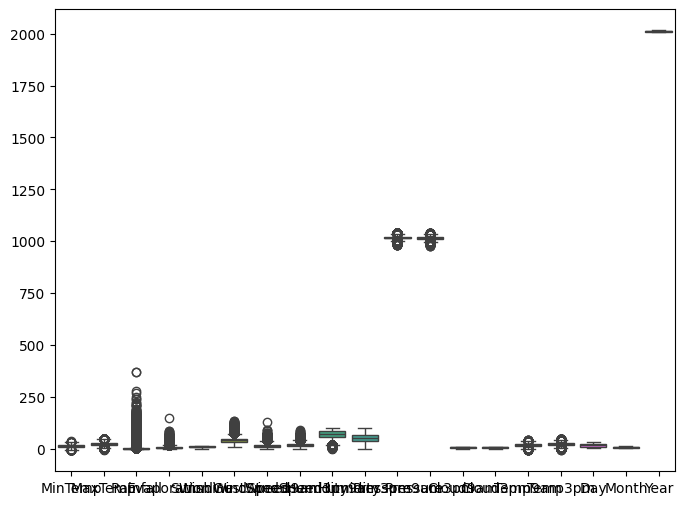

In [94]:
plt.figure(figsize=(8,6))
sns.boxplot(df[numerics])


In [92]:
# for i in df[numerics].columns:
#   print(sns.boxplot(df[i]))

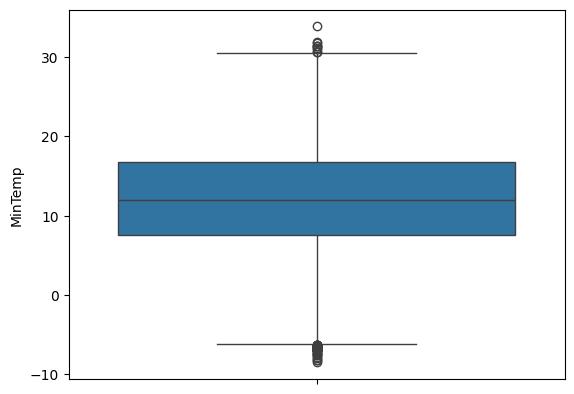

In [85]:
sns.boxplot(df['MinTemp']);

In [82]:
df['MinTemp'].min()

-8.5

In [83]:
df['MinTemp'].max()

33.9

In [84]:
#plt.boxplot(df['MinTemp']);

In [19]:
df.corr()

<ipython-input-19-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
MinTemp,1.000000,0.736015,0.104255,0.467147,0.073078,0.177927,0.175775,0.175835,-0.234441,0.005686,-0.451414,-0.462099,0.077367,0.020268,0.901828,0.708716,0.001055,-0.204058,0.037466
MaxTemp,0.736015,1.000000,-0.074839,0.588934,0.470221,0.068510,0.014468,0.051178,-0.506109,-0.509916,-0.331831,-0.427069,-0.290217,-0.279261,0.887038,0.984565,-0.000634,-0.164718,0.056025
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.001134,-0.030863,-0.009284
Evaporation,0.467147,0.588934,-0.064549,1.000000,0.366659,0.203396,0.194398,0.129166,-0.506055,-0.393149,-0.269850,-0.293098,-0.185211,-0.184395,0.545382,0.574311,-0.008158,-0.027765,0.084224
Sunshine,0.073078,0.470221,-0.227525,0.366659,1.000000,-0.032196,0.009188,0.056480,-0.492784,-0.629638,0.041071,-0.020276,-0.675846,-0.704621,0.291364,0.490386,-0.001388,0.024081,0.011846
WindGustSpeed,0.177927,0.068510,0.133497,0.203396,-0.032196,1.000000,0.604513,0.686881,-0.215117,-0.026631,-0.457710,-0.412879,0.071186,0.109340,0.150574,0.033511,-0.009456,0.060502,-0.032911
WindSpeed9am,0.175775,0.014468,0.086816,0.194398,0.009188,0.604513,1.000000,0.519980,-0.270564,-0.031638,-0.227540,-0.174497,0.024111,0.053369,0.129108,0.004878,-0.009174,0.051222,-0.022538
WindSpeed3pm,0.175835,0.051178,0.057759,0.129166,0.056480,0.686881,0.519980,1.000000,-0.145967,0.016011,-0.295207,-0.254951,0.052370,0.024769,0.163972,0.028845,-0.010162,0.060721,-0.033254
Humidity9am,-0.234441,-0.506109,0.223725,-0.506055,-0.492784,-0.215117,-0.270564,-0.145967,1.000000,0.668002,0.138916,0.186515,0.452298,0.358273,-0.473305,-0.500528,0.015408,-0.090686,0.011333
Humidity3pm,0.005686,-0.509916,0.255312,-0.393149,-0.629638,-0.026631,-0.031638,0.016011,0.668002,1.000000,-0.028127,0.051244,0.517394,0.523186,-0.222227,-0.558562,0.013206,-0.018231,-0.009024


<ipython-input-10-f044f2f5ad42>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


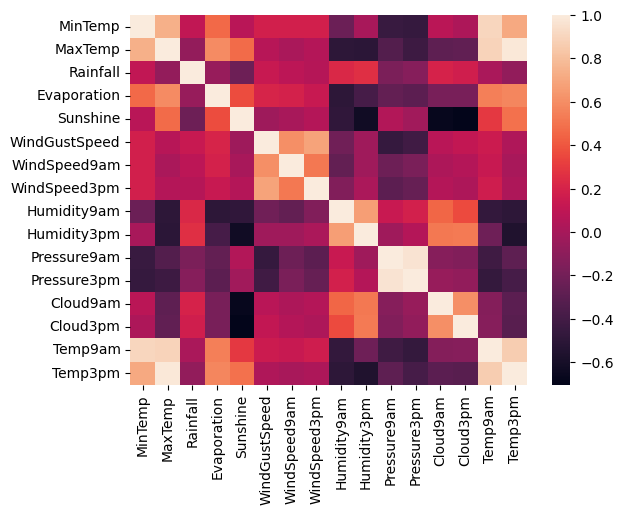

In [10]:
sns.heatmap(df.corr());

## Split the Data

In [127]:
from sklearn.model_selection import train_test_split

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       140787 non-null  object 
 1   MinTemp        140319 non-null  float64
 2   MaxTemp        140480 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81093 non-null   float64
 5   Sunshine       73982 non-null   float64
 6   WindGustDir    131624 non-null  object 
 7   WindGustSpeed  131682 non-null  float64
 8   WindDir9am     131127 non-null  object 
 9   WindDir3pm     137117 non-null  object 
 10  WindSpeed9am   139732 non-null  float64
 11  WindSpeed3pm   138256 non-null  float64
 12  Humidity9am    139270 non-null  float64
 13  Humidity3pm    137286 non-null  float64
 14  Pressure9am    127044 non-null  float64
 15  Pressure3pm    127018 non-null  float64
 16  Cloud9am       88162 non-null   float64
 17  Cloud3pm       84693 non-null

In [21]:
df.Year.value_counts()

2016    17341
2014    17181
2015    17089
2009    16514
2010    16191
2013    15935
2011    14983
2012    14894
2017     8369
2008     2229
2007       61
Name: Year, dtype: int64

In [22]:
train_df = df[df.Year<2015]

val_df = df[df.Year==2015]

test_df = df[df.Year>2015]

In [24]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

In [28]:
list(df.columns).remove('RainTomorrow')

In [ ]:
#inputs = df.columns[0:-1]

In [23]:
inputs = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Day', 'Month', 'Year']
target = 'RainTomorrow'

In [29]:
train_inputs = train_df[inputs]
train_target = train_df[target]
val_inputs = val_df[inputs]
val_target = val_df[target]
test_inputs = test_df[inputs]
test_target = test_df[target]

## Preprocessing the Data

### Imputation

In [30]:
import numpy as np

In [31]:
numerics = train_inputs.select_dtypes(include=np.number).columns.tolist()
categoricals = train_inputs.select_dtypes('object').columns.tolist()

In [32]:
from sklearn.impute import SimpleImputer

In [ ]:
df['WindDir3PM'].fillna(df['WindDir3PM'].mode()[0])

In [33]:
imputer = SimpleImputer(strategy = 'mean').fit(df[numerics])

In [34]:
train_inputs[numerics] = imputer.transform(train_inputs[numerics])
val_inputs[numerics] = imputer.transform(val_inputs[numerics])
test_inputs[numerics] = imputer.transform(test_inputs[numerics])

<ipython-input-34-500e67fd24ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numerics] = imputer.transform(train_inputs[numerics])
<ipython-input-34-500e67fd24ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[numerics] = imputer.transform(val_inputs[numerics])
<ipython-input-34-500e67fd24ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [35]:
cat_imputer = SimpleImputer(strategy = 'most_frequent').fit(df[categoricals])

In [36]:
train_inputs[categoricals] = cat_imputer.transform(train_inputs[categoricals])
val_inputs[categoricals] = cat_imputer.transform(val_inputs[categoricals])
test_inputs[categoricals] = cat_imputer.transform(test_inputs[categoricals])

<ipython-input-36-91435db039cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[categoricals] = cat_imputer.transform(train_inputs[categoricals])
<ipython-input-36-91435db039cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[categoricals] = cat_imputer.transform(val_inputs[categoricals])
<ipython-input-36-91435db039cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [37]:
# df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
# df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
# df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

### Scaling & Encoding

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [39]:
scaler = StandardScaler().fit(df[numerics])
train_inputs[numerics] = scaler.transform(train_inputs[numerics])
val_inputs[numerics] = scaler.transform(val_inputs[numerics])
test_inputs[numerics] = scaler.transform(test_inputs[numerics])

<ipython-input-39-2b36ee385e11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numerics] = scaler.transform(train_inputs[numerics])
<ipython-input-39-2b36ee385e11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[numerics] = scaler.transform(val_inputs[numerics])
<ipython-input-39-2b36ee385e11>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [40]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df[categoricals])
encoded_cols = list(encoder.get_feature_names_out(categoricals))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categoricals])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categoricals])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categoricals])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-40-8ba51424cce9>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categoricals])
<ipython-input-40-8ba51424cce9>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] 

In [41]:
train_inputs = train_inputs[numerics + encoded_cols]
val_inputs = val_inputs[numerics + encoded_cols]
test_inputs = test_inputs[numerics + encoded_cols]

## Fit the Model

In [42]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression(max_iter=1000)

In [46]:
model.fit(train_inputs, train_target)

LogisticRegression(max_iter=1000)

In [47]:
train_preds = model.predict(train_inputs)
val_preds = model.predict(val_inputs)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(train_target, train_preds)

0.8525125525574561

In [50]:
train_target.value_counts()

No     76190
Yes    21798
Name: RainTomorrow, dtype: int64

In [51]:
f1_score(train_target, train_preds,pos_label='Yes')

0.6135208857035889

In [52]:
f1_score(val_target, val_preds,pos_label='Yes')

0.5684539302446643

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
model = DecisionTreeClassifier(class_weight='balanced')

In [55]:
model.fit(train_inputs, train_target)

DecisionTreeClassifier(class_weight='balanced')

In [56]:
train_preds = model.predict(train_inputs)
val_preds = model.predict(val_inputs)

In [57]:
f1_score(train_target, train_preds,pos_label='Yes')

1.0

In [58]:
f1_score(val_target, val_preds,pos_label='Yes')

0.4934352907228394

In [157]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
model = RandomForestClassifier(class_weight='balanced')

In [62]:
model.fit(train_inputs, train_target)

RandomForestClassifier(class_weight='balanced')

In [63]:
train_preds = model.predict(train_inputs)
val_preds = model.predict(val_inputs)

In [64]:
f1_score(train_target, train_preds,pos_label='Yes')

0.9999541221268983

In [65]:
f1_score(val_target, val_preds,pos_label='Yes')

0.5393424455116366

In [66]:
import xgboost as xgb

In [67]:
# Initialize an XGBoost classifier
model = xgb.XGBClassifier()
train_target = train_target.map({'No': 0, 'Yes': 1})
val_target = val_target.map({'No': 0, 'Yes': 1})

# Train the model
model.fit(train_inputs, train_target)

# Make predictions
train_preds = model.predict(train_inputs)
val_preds = model.predict(val_inputs)

# Evaluate the model
f1_score(train_target, train_preds)

0.7384750400082598

In [68]:
f1_score(val_target, val_preds)

0.6006066734074823

With hyperparameter tuning, GridSearchCV & Cross-validation, the score can be improved even more.